In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import seaborn as sns

yf.pdr_override() 

In [3]:
es_df = pdr.DataReader("ES=F", start="2020-01-01", end="2022-12-31", period='1d')
es_df['Range'] = es_df['High'] - es_df['Low']
es_df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Range
Date,,,,,,,
2020-01-02,3237.00,3261.75,3234.25,3259.00,3259.00,1416241,27.50
2020-01-03,3261.00,3263.50,3206.75,3235.50,3235.50,1755057,56.75
2020-01-06,3220.25,3249.50,3208.75,3243.50,3243.50,1502748,40.75
2020-01-07,3243.50,3254.50,3226.00,3235.25,3235.25,1293494,28.50
2020-01-08,3231.75,3267.75,3181.00,3260.25,3260.25,2279138,86.75
...,...,...,...,...,...,...,...
2022-12-23,3850.00,3872.50,3821.25,3869.75,3869.75,1374913,51.25
2022-12-27,3878.00,3900.50,3837.25,3855.00,3855.00,1006414,63.25
2022-12-28,3858.00,3875.00,3804.50,3807.50,3807.50,1282810,70.50


In [4]:
qt_df = pd.DataFrame(pd.qcut(es_df['Volume'], 10, labels= False) + 1)
qt_df.columns = ['Quantile_Volume']

In [5]:
qt_df['Quantile_Range'] = pd.qcut(es_df['Range'], 10, labels=False) + 1


/home/pyquant/mambaforge/envs/finance/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


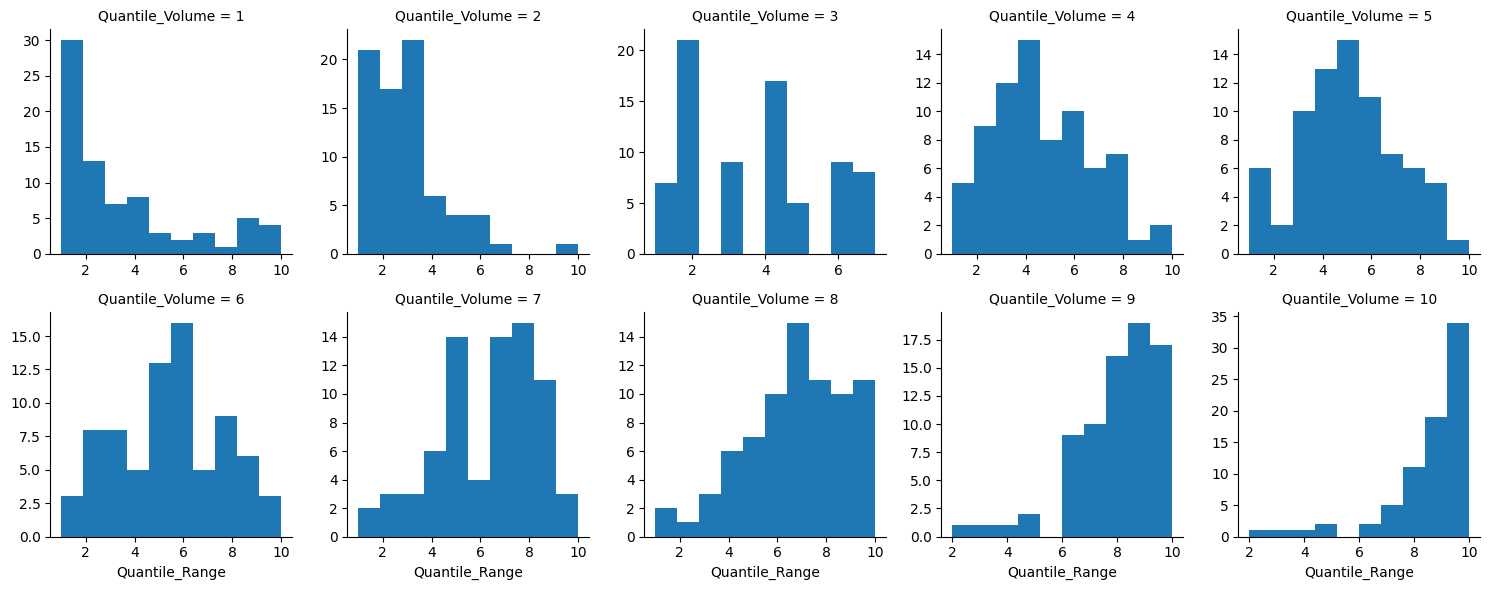

In [6]:
graph = sns.FacetGrid(qt_df[["Quantile_Volume", "Quantile_Range"]], col="Quantile_Volume", sharex=False, sharey=False, col_wrap=5)
graph.map(plt.hist, 'Quantile_Range', bins=10)
plt.show()


In [7]:
from mpl_toolkits.mplot3d import Axes3D


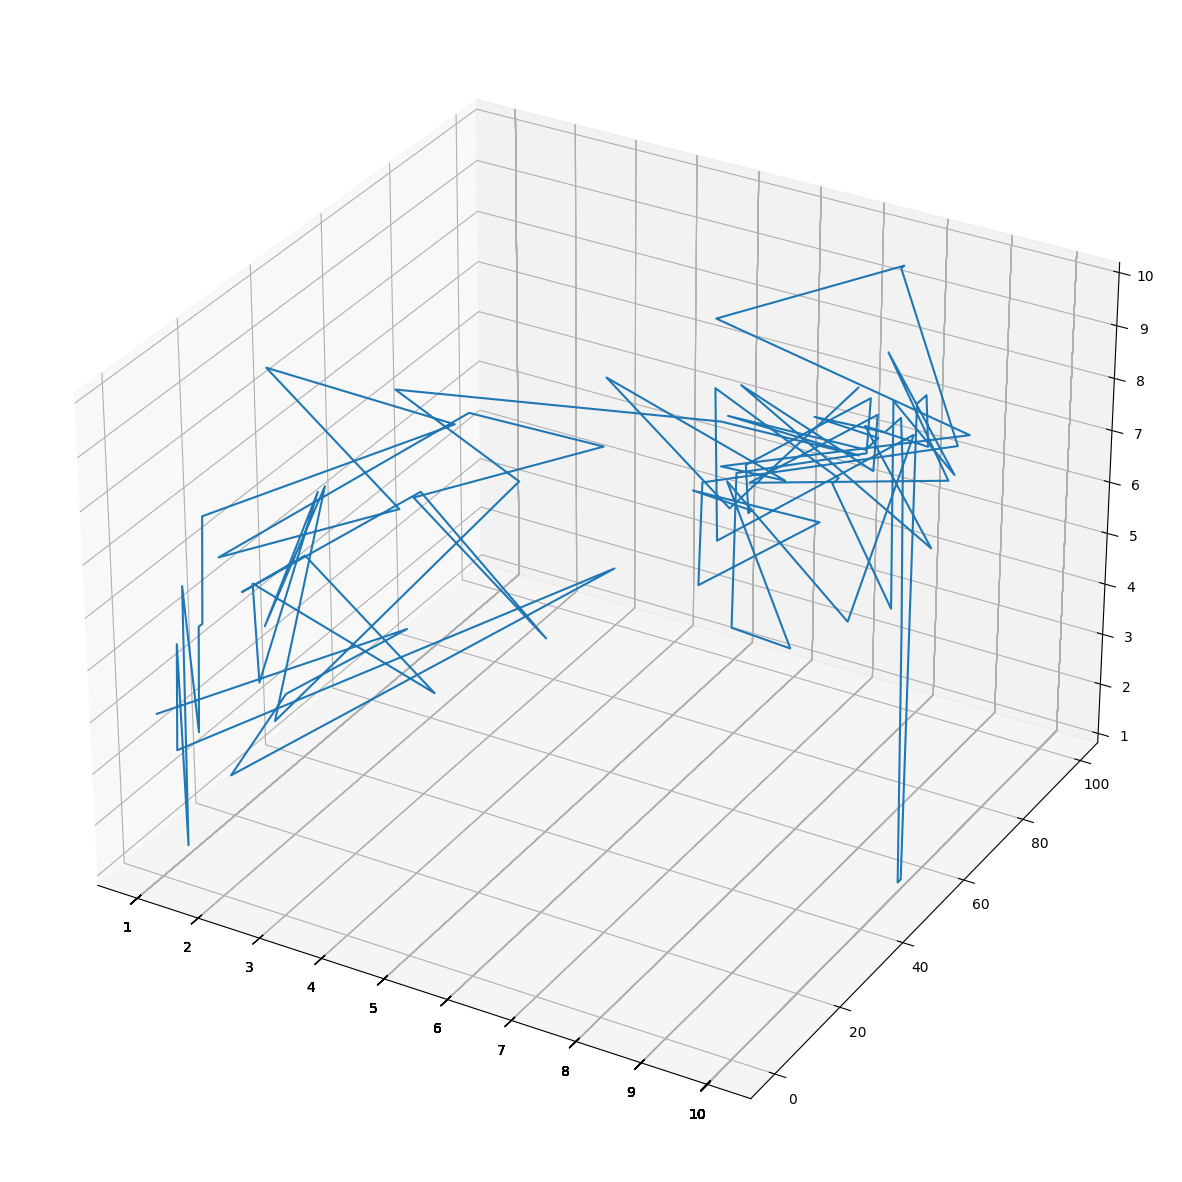

In [8]:
fig = plt.figure(figsize=(15,20))
ax = plt.axes(projection='3d')
# ax.plot_trisurf(es_df['Quantile_Range'], es_df.index, es_df['Quantile_Volume'])
y = list(range(100))
x = qt_df['Quantile_Range'].iloc[:100]
z = qt_df['Quantile_Volume'].iloc[:100]
ax.plot3D(x,y,z)
ax.xaxis.set_ticks(x)

plt.show()


In [9]:
qt_df[['Quantile_Volume', 'Quantile_Range']].corr()


,Quantile_Volume,Quantile_Range
Quantile_Volume,1.000000,0.657759
Quantile_Range,0.657759,1.000000


In [10]:
np.corrcoef(es_df['Volume'].rank(pct=True),es_df['Range'].rank(pct=True))


array([[1.      , 0.665928],
       [0.665928, 1.      ]])

In [11]:
es_df

,Open,High,Low,Close,Adj Close,Volume,Range
Date,,,,,,,
2020-01-02,3237.00,3261.75,3234.25,3259.00,3259.00,1416241,27.50
2020-01-03,3261.00,3263.50,3206.75,3235.50,3235.50,1755057,56.75
2020-01-06,3220.25,3249.50,3208.75,3243.50,3243.50,1502748,40.75
2020-01-07,3243.50,3254.50,3226.00,3235.25,3235.25,1293494,28.50
2020-01-08,3231.75,3267.75,3181.00,3260.25,3260.25,2279138,86.75
...,...,...,...,...,...,...,...
2022-12-23,3850.00,3872.50,3821.25,3869.75,3869.75,1374913,51.25
2022-12-27,3878.00,3900.50,3837.25,3855.00,3855.00,1006414,63.25
2022-12-28,3858.00,3875.00,3804.50,3807.50,3807.50,1282810,70.50


$$ Percent Range = \frac{High-Open}{Open}+\frac{Open-Low}{Open} $$

In [12]:
# es_df["Perc_Range"] = (( ((es_df['High'] - es_df['Open']) / es_df['Open'])
                        # + ((es_df["Open"] - es_df['Low']) / es_df['Open']) ) * 100).round(3)
# es_df

In [13]:
train = es_df.iloc[:500]
test = es_df.iloc[500:]

In [14]:
test = np.log(es_df['High']/es_df['Low'])*100
test

Date
2020-01-02    0.846680
2020-01-03    1.754228
2020-01-06    1.261969
2020-01-07    0.879567
2020-01-08    2.690606
                ...   
2022-12-23    1.332270
2022-12-27    1.634879
2022-12-28    1.836109
2022-12-29    1.989921
2022-12-30    1.286986
Length: 758, dtype: float64

In [15]:
from arch import arch_model

model = arch_model(test, mean='Constant', vol='GARCH')
model = model.fit()

ModuleNotFoundError: No module named 'arch'

In [ ]:
model.conf_int(alpha=.2)

,lower,upper
mu,1.472547,1.695176
omega,0.067578,0.194697
alpha[1],0.149053,0.248185
beta[1],0.627955,0.770080


In [ ]:
es_df

,Open,High,Low,Close,Adj Close,Volume,Range
Date,,,,,,,
2020-01-02,3237.00,3261.75,3234.25,3259.00,3259.00,1416241,27.50
2020-01-03,3261.00,3263.50,3206.75,3235.50,3235.50,1755057,56.75
2020-01-06,3220.25,3249.50,3208.75,3243.50,3243.50,1502748,40.75
2020-01-07,3243.50,3254.50,3226.00,3235.25,3235.25,1293494,28.50
2020-01-08,3231.75,3267.75,3181.00,3260.25,3260.25,2279138,86.75
...,...,...,...,...,...,...,...
2022-12-23,3850.00,3872.50,3821.25,3869.75,3869.75,1374913,51.25
2022-12-27,3878.00,3900.50,3837.25,3855.00,3855.00,1006414,63.25
2022-12-28,3858.00,3875.00,3804.50,3807.50,3807.50,1282810,70.50


# Quantile

In [ ]:
vol_range = es_df['Volume']/es_df['Range'] 
vol_range.name = "VPR"
Quantile_VPR = pd.qcut(vol_range, 10, labels=False) + 1

In [ ]:
np.corrcoef(Quantile_VPR, es_df['Range'])

array([[ 1.        , -0.71945427],
       [-0.71945427,  1.        ]])

In [ ]:
np.corrcoef(Quantile_VPR.iloc[1:], es_df['Range'].shift().dropna())

array([[ 1.        , -0.38998618],
       [-0.38998618,  1.        ]])

In [ ]:
qt_df['Quantile_VPR'] = Quantile_VPR

In [ ]:
qt_df

,Quantile_Volume,Quantile_Range,Quantile_VPR
Date,,,
2020-01-02,4,1,10
2020-01-03,7,5,7
2020-01-06,5,3,9
2020-01-07,3,2,10
2020-01-08,9,8,5
...,...,...,...
2022-12-23,4,4,6
2022-12-27,1,6,2
2022-12-28,3,6,3


# Volume Per Range

In [ ]:
vpr_df = es_df[['Volume', 'Range']].join(vol_range, how='outer')

In [ ]:
vpr_df = vpr_df.join(es_df[['High', 'Low']], how= 'outer')

In [ ]:
vpr_df["5High"] = vpr_df['High'].rolling(5).max()
vpr_df["5Low"] = vpr_df['Low'].rolling(5).min()

In [ ]:
vpr_df

,Volume,Range,VPR,High,Low,5High,5Low
Date,,,,,,,
2020-01-02,1416241,27.50,51499.672727,3261.75,3234.25,NaN,NaN
2020-01-03,1755057,56.75,30926.114537,3263.50,3206.75,NaN,NaN
2020-01-06,1502748,40.75,36877.251534,3249.50,3208.75,NaN,NaN
2020-01-07,1293494,28.50,45385.754386,3254.50,3226.00,NaN,NaN
2020-01-08,2279138,86.75,26272.484150,3267.75,3181.00,3267.75,3181.0
...,...,...,...,...,...,...,...
2022-12-23,1374913,51.25,26827.570732,3872.50,3821.25,3919.75,3788.5
2022-12-27,1006414,63.25,15911.683794,3900.50,3837.25,3919.75,3788.5
2022-12-28,1282810,70.50,18195.886525,3875.00,3804.50,3919.75,3788.5


In [ ]:
vpr_df['C5Volume'] = vpr_df['Volume'].rolling(5).sum()

In [ ]:
vpr_df

,Volume,Range,VPR,High,Low,5High,5Low,C5Volume
Date,,,,,,,,
2020-01-02,1416241,27.50,51499.672727,3261.75,3234.25,NaN,NaN,NaN
2020-01-03,1755057,56.75,30926.114537,3263.50,3206.75,NaN,NaN,NaN
2020-01-06,1502748,40.75,36877.251534,3249.50,3208.75,NaN,NaN,NaN
2020-01-07,1293494,28.50,45385.754386,3254.50,3226.00,NaN,NaN,NaN
2020-01-08,2279138,86.75,26272.484150,3267.75,3181.00,3267.75,3181.0,8246678.0
...,...,...,...,...,...,...,...,...
2022-12-23,1374913,51.25,26827.570732,3872.50,3821.25,3919.75,3788.5,7686950.0
2022-12-27,1006414,63.25,15911.683794,3900.50,3837.25,3919.75,3788.5,7287590.0
2022-12-28,1282810,70.50,18195.886525,3875.00,3804.50,3919.75,3788.5,7028532.0


In [ ]:
vpr_df['5Range']= vpr_df['5High'] - vpr_df['5Low']

In [ ]:
vpr_df['C5VPR'] = vpr_df['C5Volume'] / vpr_df['5Range']

In [ ]:
vpr_df

,Volume,Range,VPR,High,Low,5High,5Low,C5Volume,5Range,C5VPR
Date,,,,,,,,,,
2020-01-02,1416241,27.50,51499.672727,3261.75,3234.25,NaN,NaN,NaN,NaN,NaN
2020-01-03,1755057,56.75,30926.114537,3263.50,3206.75,NaN,NaN,NaN,NaN,NaN
2020-01-06,1502748,40.75,36877.251534,3249.50,3208.75,NaN,NaN,NaN,NaN,NaN
2020-01-07,1293494,28.50,45385.754386,3254.50,3226.00,NaN,NaN,NaN,NaN,NaN
2020-01-08,2279138,86.75,26272.484150,3267.75,3181.00,3267.75,3181.0,8246678.0,86.75,95062.570605
...,...,...,...,...,...,...,...,...,...,...
2022-12-23,1374913,51.25,26827.570732,3872.50,3821.25,3919.75,3788.5,7686950.0,131.25,58567.238095
2022-12-27,1006414,63.25,15911.683794,3900.50,3837.25,3919.75,3788.5,7287590.0,131.25,55524.495238
2022-12-28,1282810,70.50,18195.886525,3875.00,3804.50,3919.75,3788.5,7028532.0,131.25,53550.720000
